DATASET : [CAR EVALUATION](https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_car = pd.read_csv('/content/car_evaluation.csv',header=None)
df_car.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names
df_car

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
df_car.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object
class,object


In [5]:
df_car['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [6]:
df_car.isna().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


# CODIFICACION DE VARIABLES CATEGORICAS

In [7]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


In [8]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=df_car.columns)
df_car_encoder = encoder.fit_transform(df_car)
df_car_encoder.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1
5,1,1,1,1,2,3,1
6,1,1,1,1,3,1,1
7,1,1,1,1,3,2,1
8,1,1,1,1,3,3,1
9,1,1,1,2,1,1,1


#ENTRENAMIENTO DEL MODELO

In [9]:
X = df_car_encoder.drop(['class'],axis = 1)
y = df_car_encoder['class']
print(X)
print(y)

      buying  maint  doors  persons  lug_boot  safety
0          1      1      1        1         1       1
1          1      1      1        1         1       2
2          1      1      1        1         1       3
3          1      1      1        1         2       1
4          1      1      1        1         2       2
...      ...    ...    ...      ...       ...     ...
1723       4      4      4        3         2       2
1724       4      4      4        3         2       3
1725       4      4      4        3         3       1
1726       4      4      4        3         3       2
1727       4      4      4        3         3       3

[1728 rows x 6 columns]
0       1
1       1
2       1
3       1
4       1
       ..
1723    4
1724    3
1725    1
1726    4
1727    3
Name: class, Length: 1728, dtype: int64


In [10]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [11]:
X_train.shape,X_test.shape

((1209, 6), (519, 6))

In [12]:
y_train.shape,y_test.shape

((1209,), (519,))

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2,random_state=0)

tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [14]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# EVALUACIÓN DEL MODELO

In [15]:
from sklearn.metrics import accuracy_score

train_accuracy_tree = accuracy_score(y_train,y_train_pred)
test_accuray_tree =  accuracy_score(y_test,y_test_pred)

print(f'El accuracy en train es  : {train_accuracy_tree}')
print(f'El accuracy en test es  : {test_accuray_tree}')

El accuracy en train es  : 0.771712158808933
El accuracy en test es  : 0.791907514450867


<ipython-input-16-3ee1c81be197>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns,y=importances,palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)


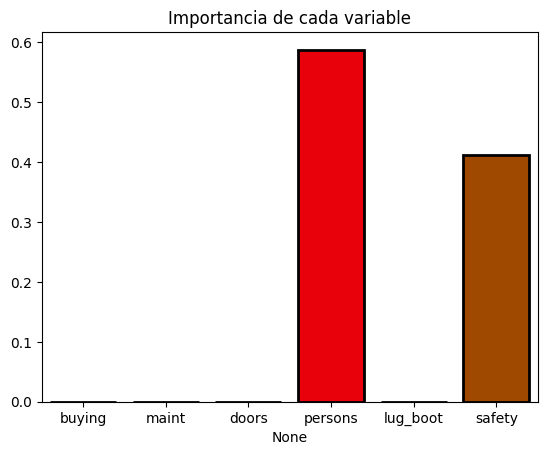

In [16]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns,y=importances,palette = 'bright', saturation = 2.0, edgecolor ='black', linewidth = 2)
plt.title('Importancia de cada variable')
plt.show()

# ENTRENAMIENTO DE MODELO USANDO RANDOM FOREST

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10,random_state=00000)

rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [19]:
rf_y_train_pred = rf.predict(X_train)
rf_y_test_pred = rf.predict(X_test)

#Calculo el accuracy en Train
rf_train_accuracy = accuracy_score(y_train, rf_y_train_pred)

#Calculo el accuracy en Test
rf_test_accuracy = accuracy_score(y_test, rf_y_test_pred)

print(f'En Random Forest el accuracy en train es  : {rf_train_accuracy}')
print(f'En Random Forest el accuracy en test es  : {rf_test_accuracy}')


En Random Forest el accuracy en train es  : 0.9991728701406121
En Random Forest el accuracy en test es  : 0.9441233140655106


In [20]:
#Verificamos el feature importances
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": rf.feature_importances_}).sort_values("importance", ascending = False)

# Mostrar
feature_importances_df

,feature,importance
5,safety,0.307429
3,persons,0.228673
0,buying,0.202163
1,maint,0.118010
4,lug_boot,0.083882
2,doors,0.059844


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'safety'),
  Text(1, 0, 'persons'),
  Text(2, 0, 'buying'),
  Text(3, 0, 'maint'),
  Text(4, 0, 'lug_boot'),
  Text(5, 0, 'doors')])

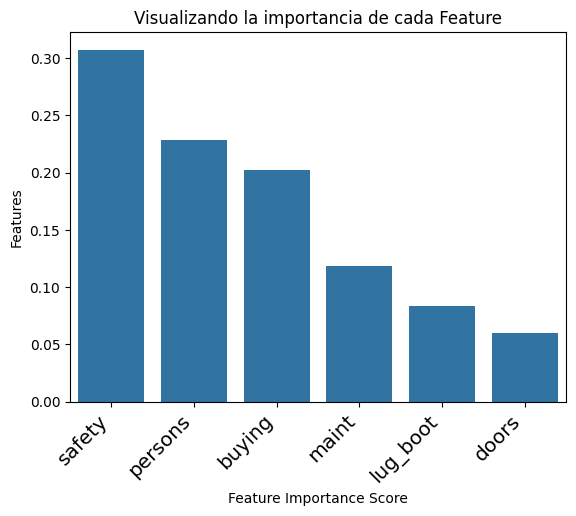

In [21]:
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada Feature")
plt.xticks(rotation=45, horizontalalignment = "right", fontweight="light", fontsize="x-large")